# Artificial Neural Networks and Deep Learning

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## What this is about:

- Artificial Neural Networks

- Deep Learning

- MNIST digit recognition

As usual our emphasis will be on *doing* rather than *proving*:
*just enough: progress at pace*

### Assigned Reading

For this material you are recommended Chapter 3 of [UDL], 
then Chapter 3 of [NND], and Chapter 6 of [MLFCES], 

- UDL: Understanding Deep Learning, by Simon J.D. Prince. PDF draft available here:
<https://udlbook.github.io/udlbook/>
- NND: Neural Network Design by Martin T. Hagan, Howard B. Demuth, Mark Hudson Beale, Orlando De Jesús. <https://hagan.okstate.edu/nnd.html> and <https://hagan.okstate.edu/NNDesign.pdf>
- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm,
  Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. 
  <http://smlbook.org>.


These can be accessed legally and without cost.

There are also these useful references for coding:

- PT: `python`: <https://docs.python.org/3/tutorial>
- NP: `numpy`: <https://numpy.org/doc/stable/user/quickstart.html>
- MPL: `matplotlib`: <https://matplotlib.org>

## Context

In the last section of this course we are going to take a look at the 
mathematical formulation of artificial neural networks.

We will be building on the feed forward algorithm we met in the section
on perceptrons.

We know that if we have the weights and biases we can (at least imagine)
that the networks carves up the output space into compartments that can
be used for classification.

But we need to start with training data, and use this to determine the
weights and biases. We will cover the essentials of:

- Gradient Descent
- Learning Rate (in particular) and hyperparameters (in general)
- back propagation
- activation functions

We start by looking at the data we are going to use: 
**The MNIST data set of handwritten digits**.

This will all be done manually - we wont use `sklearn` for this section


In [56]:
# our usual imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas
import matplotlib.pyplot as plt

### MNIST Data Set of Handwritten Digits

The original source of these digitized images is here:
<http://yann.lecun.com/exdb/mnist/>

This format isn't particularly easy to work with, so here,
<https://pjreddie.com/projects/mnist-in-csv/>, makes two 
CSV files available:

- `MNIST_train.csv` - $60,000$ handwritten digit images, for training
- `MNIST_test.csv`  - $10,000$ handwritten digit images, for testing

Further, for testing and development it is useful to have
small data sets, and so Rashid for his book 
**Make Your Own Neural Network**
<https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork>
made these two smaller sets,

- `MNIST_train_100.csv` - $100$, for training
- `MNIST_test_10.csv` - $10$, for testing

This book was also used for these notes. Note that the test set here is not *exhaustive*
in that not all labels are included. This means that you'll get errors below for the confusion mamtrix if you use this one.

There are also these (home made), for intermediate use:

- `MNIST_train_1000.csv` - $1000$, for training
- `MNIST_test_100.csv` - $100$, for testing    

Let's get the data - you may need to need to grab it and unzip it from
Brightspace (or use binder).

We'll make it easy to choose which data set with a `choice` variable.

In [57]:
choice = 2
if choice == 0:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test.csv', header=None)
elif choice == 1:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train_1000.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test_100.csv', header=None)
elif choice == 2:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train_100.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test_100.csv', header=None)
else:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train_100.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test_10.csv', header=None)

In [58]:
# it will take a bit of work to see what these data files hold
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This doesn't look too promising ... but we'll get there. 

The first column contains the labels. The remaining columns contain 
$28^2$ pixel values for the digitized image of the label.

Let's push on ...

In [59]:
# We assign the pixel values to X_train and X_test
X_train = df_train.iloc[:, 1:].values
X_test  = df_test.iloc[:, 1:].values
N_train = X_train.shape[0]
N_test  = X_test.shape[0]
print(f'N_train = {N_train}, N_test = {N_test}')

# And we assign the first column 0,1,2,...,9 labels to 
train_labels = df_train.iloc[:, 0].values
test_labels  = df_test.iloc[:, 0].values

print(X_train.shape)
print(X_test.shape)
print(train_labels.shape)
print(test_labels.shape)

N_train = 100, N_test = 100
(100, 784)
(100, 784)
(100,)
(100,)


Here are the first 10 labels in the training set... 

In [60]:
print(train_labels[:9])

[5 0 4 1 9 2 1 3 1]


And now the first ten labels in the test set...

In [61]:
print(test_labels[:9])

[3 8 0 5 4 3 8 3 2]


We choose the third row (indexed as 2) in the training set to demonstrate

There are 28x28 = 784 pixel values: 0,1,...,255
0 is white, 255 is black 2,3,...,254 are grays


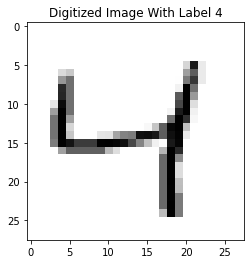

In [62]:
# Let's choose the third row (indexed as 2) 
row = 2
plt.imshow( X_train[row,:].reshape(28,28) , cmap='Greys', interpolation='None')
plt.title(f'Digitized Image With Label {train_labels[row]}')
print(f'There are 28x28 = {28*28} pixel values: 0,1,...,255')
print('0 is white, 255 is black 2,3,...,254 are grays')

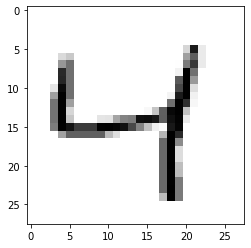

In [63]:
# scale pixel values to [0,1] - this is recommended. 
X_train = X_train/255
X_test  = X_test/255
plt.imshow(X_train[row,:].reshape(28,28) , cmap='Greys', interpolation='None')

### Our Neural Network

We want a neural network that will accept a digitized image as input

This has $28^2=784$ inputs, one for each pixel value.

There are $10$ possible outputs - corresponding to the digits 
$\{0,1,2,3,4,5,6,7,8,9\}$.

Our network will have $10$ outputs. For a given input we want the 
output to be all zeros except for one which is unity. This 
nopn-zero will be in the position of the label.

So, if the label is $7$ then we want the output to be 
$(0,0,0,0,0,0,0,1,0,0)^T. (Note the transpose - column vectors only.)

This is called **one hot encoding**. Let's set up the output data for
the training and the test sets.

In [64]:
# make evry entry zero to begin with ...
y_train = np.zeros((10, N_train))
y_test = np.zeros((10, N_test))
print(f'Shape of: y_train = {y_train.shape}, y_test = {y_test.shape}')

Shape of: y_train = (10, 100), y_test = (10, 100)


### One-Hot Encoding

We will one-hot encode the labels redy for implementation in a neural
network. There are 10 possible output values corresponding to the labels
$\{0,1,2,3,4,5,6,7,8,9\}$.

We want to use the `train_labels` and `test_labels` data from above
to create `y_train` and `y_test`.

These will be matrices with each column having $10$ entries. 
in `y_train` there will be asmany columns as there are training data points
(i.e. `N_train`). And in `y_test` there will be as many columns as there
are test data points (i.e. `N_test`).

Each column is all zero except for unity in the position corresponding to
the label for that column.

Above we saw that with `choice = 2`, the third data point in the training set
had label $4$.

Hence the third column of `y_train` will be $(0,0,0,0,1,0,0,0,0,0)$.

We loop through the two data sets, grab each label in turn, and set
that position equal to unity. 

In [65]:
for k in range(N_train):
  label = train_labels[k]
  y_train[label,k] = 1

for k in range(N_test):
  label = test_labels[k]
  y_test[label,k] = 1

We can plot the sums to see how many of each label there are.

<BarContainer object of 10 artists>

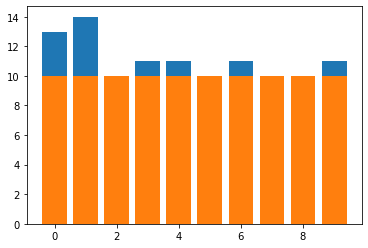

In [66]:
plt.bar(range(10),y_train.sum(axis=1))
plt.bar(range(10),y_test.sum(axis=1))

And, because we like to always be checking our work, we can add up all the
ones in each of these and make sure there are the same sumber as
`N_train` and `N_test`.

In [67]:
# add up all the ones
print(y_train.sum(axis=1).sum())
print(y_test.sum(axis=1).sum())

100.0
100.0


If you are sharp-eyed you may have noticed that we are breaking one
of our rules here. We've always insisted that our features vary along the 
columns, with our observations listed down the rows. 

That's the opposite of what we have done for `X_train` and `X_test`.

It doesn't matter - we just have to be consistent with our coding below.

**NOTE** the term **one hot** is an electrical analogy wherein one terminal
is considered *hot* and the other *cold* (i.e. *on* and *off*).

### Our Neural Network Architecture

We have an input layer of $28^2=784$ nodes (neurons) accepting
a pixel value per node, and an output layer of $10$ neurons caapble of
yielding a one-hot encoded output.

We'll choose **two hidden layers** with $500$ nodes on the first
and $200$ on the second. These are **hyperparameters** - we have to choose
them and build them into our design. Once chosen they remain fixed.

We have already seen this type of thing, along with the feed forward
algorithm.

This is a more general network with two hidden layers.

<table>
<tr>
<td>
<img src="./gfx/ann_4.png" style="height:500px"/>
</td>
<td>

\begin{align*}
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n}_1),
\\
\boldsymbol{n}_2 & = \boldsymbol{W}_2^T\boldsymbol{a}_1+\boldsymbol{b}_2,
\\
\boldsymbol{a}_2 & = \sigma_2(\boldsymbol{n}_2),
\\
\boldsymbol{n}_3 & = \boldsymbol{W}_3^T\boldsymbol{a}_2+\boldsymbol{b}_3,
\\
\boldsymbol{a}_3 & = \sigma_3(\boldsymbol{n}_3),
\\
\boldsymbol{y} & = \boldsymbol{a}_3.
\end{align*}
</td>
</tr>
</table>


We initialise our network architecture along with the weights and biases as follows.

In [68]:
inn = 784  # number of nodes on input layer
h1n = 500  # number of nodes on first hidden layer
h2n = 200  # number of nodes on second hidden layer
onn = 10   # number of nodes on output layer

# weights and biases
# random initialization is typical - there are other ways too.
W1 = 0.5 - np.random.rand(inn,h1n) # weights connecting input to first hidden
W2 = 0.5 - np.random.rand(h1n,h2n) # weights connecting first to second hidden
W3 = 0.5 - np.random.rand(h2n,onn) # weights connecting second hidden to output

# zero is good for this - the network will learn 'better' values.
b1 = np.zeros([h1n,1]) # bias on first hidden
b2 = np.zeros([h2n,1]) # bias on second hidden
b3 = np.zeros([onn,1]) # bias on output

print(f'W1 shape: {W1.shape}, W2 shape: {W2.shape}, W3 shape: {W3.shape}')
print(f'b1 shape: {b1.shape}, b2 shape: {b2.shape}, b3 shape: {b3.shape}')

W1 shape: (784, 500), W2 shape: (500, 200), W3 shape: (200, 10)
b1 shape: (500, 1), b2 shape: (200, 1), b3 shape: (10, 1)


### The Feed Forward Algorithm

We have already seen this. The feed forward algortithm,
for $L$ layers (not including the input layer) is,

\begin{align*}
& \boldsymbol{a}_0 = \boldsymbol{x},
\\
& \text{for } k = 1,2,\ldots,L,
\\
&\qquad \boldsymbol{n}_k = \boldsymbol{W}_k^T\boldsymbol{a}_{k-1}+\boldsymbol{b}_k,
\\
&\qquad \boldsymbol{a}_k = \sigma_k(\boldsymbol{n}_k),
\\
&\boldsymbol{y} = \boldsymbol{a}_L.
\end{align*}

where $\sigma$ is the activation function. We have seen the Heaviside
function for this, as well as the sigmoid and the ReLU.

We define them with python functions, and we also need their
derivatives.

In [69]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def ReLU(x):
  return np.maximum(0,x)

In [70]:
def Diff_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))
def Diff_ReLU(x):
  return np.heaviside(x,0)

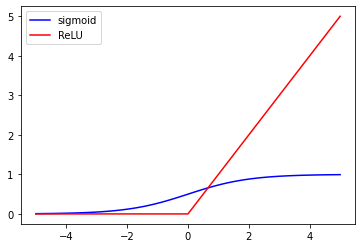

In [71]:
xvals = np.arange(-5,5+0.1,0.1)
plt.plot(xvals, sigmoid(xvals), color='blue', label='sigmoid')
plt.plot(xvals, ReLU(xvals), color='red', label='ReLU')
plt.legend()

### Feeding Forward

Here is a typical forward pass through the network. We choose a random
integer, $k$, and use that to select a training point at random. Then
we apply the algorithm from above.

In [72]:
k = np.random.randint(0, X_train.shape[0])
a0 = X_train[k,:].reshape(-1,1)
# feed into first hidden layer and activate
n1 = W1.T @ a0 + b1
a1 = sigmoid(n1)
# feed into second hidden layer and activate
n2 = W2.T @ a1 + b2
a2 = sigmoid(n2)
# feed into output layer and activate
n3 = W3.T @ a2 + b3
a3 = sigmoid(n3)
# produce output
y = a3

**BUT THIS IS USELESS** - the weights are randon and the biases are zero.
Whatever the onput, the output will be randon.

### Learning

We want to use the training data to **learn** better values of the
weights and biases.

By **better** we mean that given an input with label, say, $5$, the 
output should be $(0,0,0,0,0,1,0,0,0,0)^T$ - a one-hot encoding of the
label corresponding to the input.

In practice our weights and biases may never be **perfect**, and
so we might not get perfect one-hot outputs. 

But we would be happy with, for example,

$$
(0.01,0.04,0.1,0.34,0.07,0.89,0.02,0.11,0.21,0.04)^T
$$

Here $0.89\approx 1$ in the index $5$ position and the other values
we treat as $\approx 0$.

We get these **better** weights and biases by setting up a cost
and minimizing it.

### Cost: Total Squared Error (TSE)

There are other choices, but we have seen this one before and so will use it. 

For a given training point, indexed by $k$ say, we have two outputs. One
we call the ground truth, and is stored in `y_train`. We will call this
$\boldsymbol{t}_k$ for **truth**. It is perfectly one-hot encoded.

The other output is the prediction from the network which is given by 
$\boldsymbol{y}_k = \boldsymbol{a}_L$ in the feed-forward algorithm above.
This will not be perfectly one-hot encoded but as we have seen above 
we can be happy with just picking the maximum value and using it as
an approximation to a one-hot encoding.

We define the TSE cost as

$$
\mathcal{E}(\boldsymbol{W}_1,\boldsymbol{W}_2,\boldsymbol{W}_3,
\boldsymbol{b}_1,\boldsymbol{b}_2,\boldsymbol{b}_3)
= \sum_{k=1}^{\mathrm{N_train}} 
\Vert\boldsymbol{t}_k-\boldsymbol{y}_k\Vert_2^2.
$$

Normally we just write $\mathcal{E}$ for brevity, but we have to always bear in
mind that it depends on all the weights and all the biases.

### The Size of the Task

We want to choose all the weights and biases so as to minimize the error. 

Recall the size of the weight matrices and bias vectors.

$$
\boldsymbol{W}_1 \in\mathbb{R}^{784\times500},
\ \boldsymbol{W}_2 \in\mathbb{R}^{500\times200},
\ \boldsymbol{W}_3 \in\mathbb{R}^{200\times10},
$$

$$
\boldsymbol{b}_1 \in\mathbb{R}^{500},
\ \boldsymbol{b}_2 \in\mathbb{R}^{200},
\ \boldsymbol{b}_3 \in\mathbb{R}^{10}.
$$

In [73]:
Wvals = W1.size + W2.size + W3.size
bvals = b1.size + b2.size + b3.size
print('Number of values to optimize = ', Wvals + bvals)

Number of values to optimize =  494710


There are nearly half a million values to optimize in the three
full weight matrices, and the three bias vectors.

### Gradient Descent

If you have ever studied multivariable calculus and looked at
optimization problems you might have seen examples of how to optimize
a function of two variables. For example,

$$
f(x,y) = 3\,{\mathrm{e}}^{-{\left(y+1\right)}^2-x^2}\,{\left(x-1\right)}^2-\frac{{\mathrm{e}}^{-{\left(x+1\right)}^2-y^2}}{3}+{\mathrm{e}}^{-x^2-y^2}\,\left(10\,x^3-2\,x+10\,y^5\right)
$$

You may remember that we need to calculate the gradient, set it to zero,
and solve for the optimal points, and then check the Hessian for the nature
of these optimal points. 

That isn't an option here. Instead the usual choice for minimizing
the cost is **Stochastic Gradient Descent**.


### Gradient Descent in Outline

The idea is to consider $\nabla f$ and note that this gives the
direction in which $f$ increases most rapidly. 

Therefore $-\nabla f$ tells us in which direction $f$ decreases most rapidly.

That's what we want - we want to get to the minimum.

We choose a point, $\boldsymbol{x}_0$ say, and then move to a new
point by **falling down the gradient**:

$$
\boldsymbol{x}_1 = \boldsymbol{x}_0 - \alpha\nabla f(\boldsymbol{x}_0).
$$

Here, and in this context, $\alpha$ is called the **learning rate**. It is another **hyperparameter**. We choose it - it does not get learned by the algorithm.

Let's see some examples of how this might work in 2D.

**NOTE** these diagrams will not show up in the PDF version of this notebook.

### Gradient Descent Demonstrations - Global and Local minima

<table>
  <tr>
    <td>
        <img src="./gfx/GradientDescent/GlobalMin.gif" style="height:300px"/>
    </td>
    <td>
        <img src="./gfx/GradientDescent/LocalMin.gif" style="height:300px"/>
    </td>
  </tr>
</table>


### Gradient Descent Demonstrations - Saddle Points

<table>
  <tr>
    <td>
        <img src="./gfx/GradientDescent/SaddlePoint1.gif" style="height:300px"/>
    </td>
    <td>
        <img src="./gfx/GradientDescent/SaddlePoint2.gif" style="height:300px"/>
    </td>
  </tr>
</table>


### Stochastic Gradient (Descent?)

This process is too computationally expensive for training big neural nets. 
Ours has nearly **half a million** independent variables and it is prtetty
modest by some standards. 

This number of independent variables tells us how many gradient component
directions there are.

A variant, called **Stochastic Gradient Descent**, or **SGD** for short, 
is often used to save computer time and resources.

We'll use this in its simplest form (so-called **mini-batch** approaches exist) 
which is to just pick one gradient component at a time and update with that.

# THIS NEEDS THOUGHT

Some people call this **Stochastic Gradient** instead of
**Stochastic Gradient Descent** because it is not guaranteed that descent
actually occurs at a given step.

Like so much of what we have done, there is so much more we could be saying
on this topic.

### The Calculus - part 1

We need $-2\boldsymbol{A}\boldsymbol{e}$

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?



### The Calculus - part 2

We need $\boldsymbol{S}=\boldsymbol{A}\boldsymbol{W}\boldsymbol{S}$

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?



### The Calculus - backprop algorithm

We need $\boldsymbol{S}=\boldsymbol{A}\boldsymbol{W}\boldsymbol{S}$
with the update formulae

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?



### Our Neural Network - training and testing


- epochs and LR as hyperparameters

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?

- ?

In [74]:
# get access to a random number generate for SGD
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
rng = np.random.default_rng()
# select a learning rate for SGD
alpha = 0.3
# loop through this many epochs
N_ep = 50
# initialise the TSE cost
TSEcost = np.zeros([N_ep,1])

We train by looping `N_ep` times through the training set.

Each such loop randomly sleects a direction (training point) in
which to learn (update) new values for the weights and biases.

The random selection is done **without replacement**.

In [75]:
for ep in range(N_ep): 
  for _ in range(N_train):
    # select a random without replacement
    j = rng.choice(N_train, 1, replace=False)
    # forward prop
    a0 = X_train[j,:].reshape(-1,1)
    n1 = W1.T @ a0 + b1
    a1 = sigmoid(n1)
    n2 = W2.T @ a1 + b2
    a2 = sigmoid(n2)
    n3 = W3.T @ a2 + b3
    a3 = sigmoid(n3)
    y = a3
    # backprop and update
    error = y_train[:,j] - y
    A3 = np.diagflat(Diff_sigmoid(n3))
    A2 = np.diagflat(Diff_sigmoid(n2))
    A1 = np.diagflat(Diff_sigmoid(n1))
    S3 = -2*A3@error
    S2 = A2@W3@S3
    S1 = A1@W2@S2

    W3 = W3 - alpha * a2@S3.T
    W2 = W2 - alpha * a1@S2.T
    W1 = W1 - alpha * a0@S1.T

    b3 = b3 - alpha * S3
    b2 = b2 - alpha * S2
    b1 = b1 - alpha * S1

  # update cost - loop through training set
  for j in range(N_train):
      a0 = X_train[j,:].reshape(-1,1)
      n1 = W1.T @ a0 + b1
      a1 = sigmoid(n1)
      n2 = W2.T @ a1 + b2
      a2 = sigmoid(n2)
      n3 = W3.T @ a2 + b3
      a3 = sigmoid(n3)
      y = a3
      error = y_train[:,[j]] - y
      TSEcost[ep] += (error * error).sum()

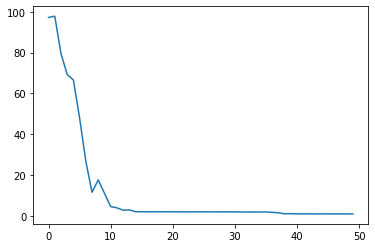

In [76]:
plt.plot(range(N_ep), TSEcost)

In [77]:
# test
y_pred = np.zeros((10, X_test.shape[0]))
print(f'Shape of y_test = {y_test.shape}')

# create scorecards...
success = np.zeros(10)
failure = np.zeros(10)

for k in range(N_test):
  # forward prop
  a0 = X_test[k,:].reshape(-1,1)
  n1 = W1.T @ a0 + b1
  a1 = sigmoid(n1)
  n2 = W2.T @ a1 + b2
  a2 = sigmoid(n2)
  n3 = W3.T @ a2 + b3
  a3 = sigmoid(n3)
  y_pred[:,[k]] = a3  
  if np.argmax(a3) == test_labels[k]:
#    print(test_labels[k])
#    print(np.argmax(a3))
    success[test_labels[k]] += 1
  else:
    failure[test_labels[k]] += 1


Shape of y_test = (10, 100)


```
y_mod = np.zeros(y_pred.shape)
print(y_test)
#print(y_pred)
indx_max = np.argmax(y_pred, axis=0)
print(indx_max)
#y_mod[indx_max,:] = 1
for k in range(N_test):
  y_mod[indx_max[k],k] = 1
print(y_mod)
```

In [78]:

y_test_cm = np.zeros(N_test)
y_pred_cm = np.zeros(N_test)
test_indx_max = np.argmax(y_test, axis=0)
#print(test_indx_max)

pred_indx_max = np.argmax(y_pred, axis=0)
for k in range(N_test):
  y_test_cm[k] = test_indx_max[k]
  y_pred_cm[k] = pred_indx_max[k]

#print(y_test_cm)
#print(y_pred_cm)

In [79]:
print(success)
print(failure)

[10.  9.  6.  9.  7.  3.  8.  7.  6.  6.]
[0. 1. 4. 1. 3. 7. 2. 3. 4. 4.]


Mac, Terminal

```
system_profiler SPPowerDataType
```

Bettrey full. Disconnect charger. Run below

```
6417 mAh at start, dim display.
```

In [80]:
# MYO small set wont fill up the full 0,1,...,9 range for the CM
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_cm, y_pred_cm)
print("Confusion Matrix:")
print(cm)
accsc = accuracy_score(y_test_cm,y_pred_cm)
print("Accuracy:", accsc)

Confusion Matrix:
[[10  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  1]
 [ 0  2  6  0  1  0  1  0  0  0]
 [ 0  0  1  9  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  3]
 [ 3  0  0  1  1  3  2  0  0  0]
 [ 0  0  0  0  2  0  8  0  0  0]
 [ 0  1  0  0  0  0  0  7  1  1]
 [ 0  1  0  1  1  0  1  0  6  0]
 [ 0  0  0  0  4  0  0  0  0  6]]
Accuracy: 0.71


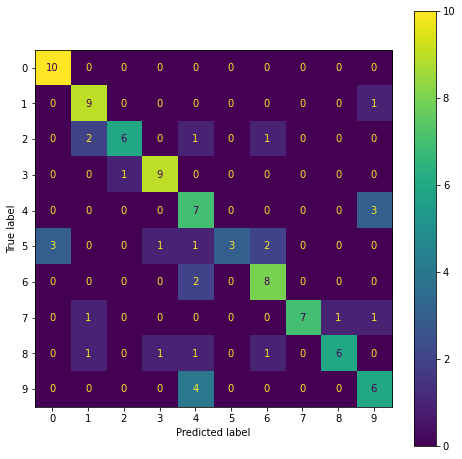

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=range(10))
#plt.figure(figsize=(15, 15))
#cmplot.plot()

fig, ax = plt.subplots(figsize=(8,8))
cmplot.plot(ax=ax)

#plt.show()

<http://playground.tensorflow.org>

<https://ethics-of-ai.mooc.fi/chapter-1/1-a-guide-to-ai-ethics>



# ANN in a few lines
21 Oct 2022 from https://twitter.com/svpino/status/1582703127651721217

In [82]:
import numpy as np

def sigmoid(x):
  return 1 / (1+np.exp(-x))

def neural_network(X,y):
    learning_rate = 0.1
    W1 = np.random.rand(2,4)
    W2 = np.random.rand(4,1)
    
    for epoch in range(1000):
        layer1 = sigmoid(np.dot(X, W1))
        output = sigmoid(np.dot(layer1, W2))
        error = y-output
        delta2 = 2 * error * (output * (1 - output))
        delta1 = delta2.dot(W2.T) * (layer1 * (1 - layer1))
        W2 += learning_rate * layer1.T.dot(delta2)
        W1 += learning_rate * X.T.dot(delta1)
    
    return np.round(output).flatten()

X = np.array([[0,0],[0,1],[1,0],[1,1]])

print(  "OR", neural_network( X, np.array([[0,1,1,1]]).T ) )
print( "AND", neural_network( X, np.array([[0,0,0,1]]).T ) )
print( "XOR", neural_network( X, np.array([[0,1,1,0]]).T ) )
print("NAND", neural_network( X, np.array([[1,1,1,0]]).T ) )
print( "NOR", neural_network( X, np.array([[1,0,0,0]]).T ) )

OR [1. 1. 1. 1.]
AND [0. 0. 0. 1.]
XOR [0. 1. 1. 1.]
NAND [1. 1. 1. 0.]
NOR [1. 0. 0. 0.]


### Review

We covered *just enough*, to make *progress at pace*. We looked at

- SVM
- distance
- ???????????????????????????????????????????????

Now we can look at the perceptron.

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 14_ann.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [83]:
%%bash
NBROOTNAME=14_ann
OUTPUTTING=0

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook 14_ann.ipynb to html
[NbConvertApp] Writing 740526 bytes to 14_ann.html
[NbConvertApp] Converting notebook 14_ann.ipynb to pdf
[NbConvertApp] Support files will be in 14_ann_files/
[NbConvertApp] Making directory ./14_ann_files
[NbConvertApp] Making directory ./14_ann_files
[NbConvertApp] Making directory ./14_ann_files
[NbConvertApp] Making directory ./14_ann_files
[NbConvertApp] Making directory ./14_ann_files
[NbConvertApp] Making directory ./14_ann_files
[NbConvertApp] Writing 85656 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 163048 bytes to 14_ann.pdf
[NbConvertApp] Converting notebook 14_ann.ipynb to script
[NbConvertApp] Writing 27420 bytes to 14_ann.p